In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import pandas as pd 

from sleep_analysis.analysis import cumulative_sleep, cumulative_bout_number, cumulative_bout_duration, cumulative_activity

from sleep_analysis.data import read_data

from sleep_analysis.analysis import mortality_filter, make_zeitgeber_df, summarize, cumulative_sleep, cumulative_bout_duration, cumulative_bout_number, cumulative_activity
from sleep_analysis.plotting import single_trial_zeitgeber_fig, zeitgeber_fig, actogram, per_diem_fig, cumulative_sleep_fig, cumulative_bout_number_fig, cumulative_bout_duration_fig, cumulative_activity_fig 
from sleep_analysis.utils import get_single_timepoint_glitches, set_light_cycle, get_lights_on_datetimes

from pingouin import anova, welch_anova, homoscedasticity, mwu
from sleep_analysis.analysis import anova_assistant

/Users/jvpro/.pyenv/versions/3.7.1/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
params = {
    'axes.labelsize': 16,
    'axes.titlesize':16,
    'xtick.labelsize':16,
    'ytick.labelsize':16
}
plt.rcParams.update(params)
pd.options.display.max_rows=150

In [3]:
mutant_path = '/Users/jvpro/Dropbox/Clandinin/GBA_Clandinin/GBA_DATA/DAM/notebooks/Dam_reproduce/m-fs4-tt.txt'
control_path = '/Users/jvpro/Dropbox/Clandinin/GBA_Clandinin/GBA_DATA/DAM/notebooks/Dam_reproduce/m-cs-iso.txt'

In [4]:
mutant_df = read_data(mutant_path)
control_df = read_data(control_path)

In [5]:
control_df = set_light_cycle(control_df, timedelta(hours=8, minutes=0))
mutant_df = set_light_cycle(mutant_df, timedelta(hours=8, minutes=0))

/Users/jvpro/src/sleep_analysis/sleep_analysis/utils.py:156: UserWarning: Using cycle of length 1 day, 0:00:00. Existing light cycle has average length of 0 days 23:59:54.285714285 over 21 well-formed cycles.
  f"Using cycle of length {cycle_length}. "


In [6]:
#summarize(control_df); 
summarize(mutant_df)

General summary:

	 Data ranges from 2021-06-30 16:51:00 to 2021-07-22 09:07:00

	 31217 timepoints

	 32 flies



No missing timepoints



Light cycle:

	 21 well-formed cycles of average length 1 days 00:00:00

	 0 malformed cycles:

		 0 too short:

		 0 too long:



In [7]:
#this slicing takes in MIDDLE of the day if done like this- so sandwichi around days you want
control_df = control_df.loc[datetime(2021, 7, 2):datetime(2021,7,9)]
mutant_df = mutant_df.loc[datetime(2021, 7, 2):datetime(2021,7,9)]

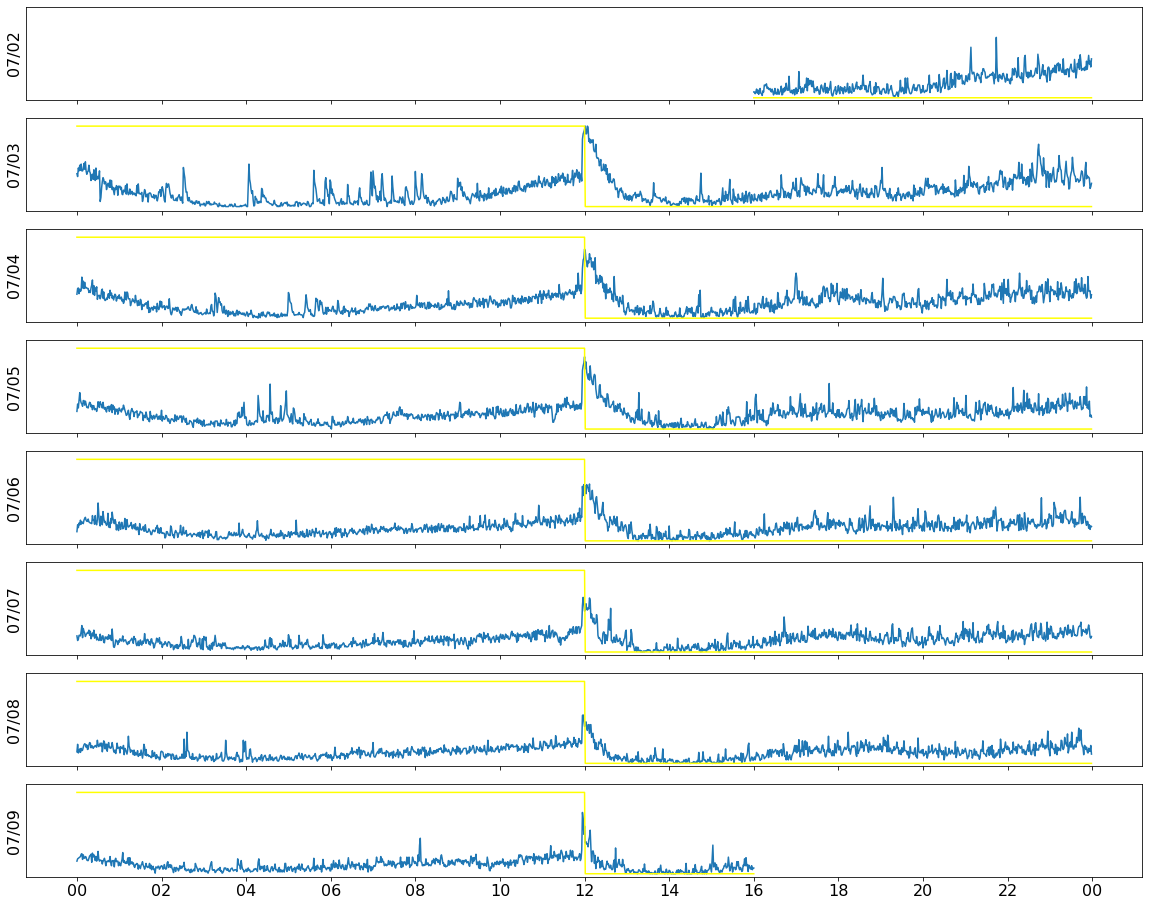

In [8]:
actogram(mutant_df)

In [9]:
mutant_df = mortality_filter(mutant_df)
control_df = mortality_filter(control_df)

Using mortality heuristic
Pruning {'fly_25', 'fly_12'}
Using mortality heuristic
Pruning {'fly_25', 'fly_3'}


In [10]:
mutant_zg_df = make_zeitgeber_df(mutant_df)
control_zg_df = make_zeitgeber_df(control_df)

(0.0, 1.0)

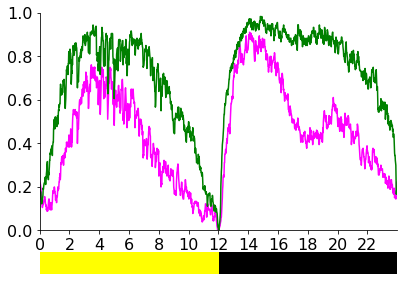

In [11]:
fig1 = single_trial_zeitgeber_fig([mutant_zg_df, control_zg_df], 
                                 [r'${gba1b}^{Δ1/ΔTT}$', '+'],
                                 colors=['magenta', 'green'],
                                show='sleep',
                                  legend =False,
                                #days=[0,1,2,3],
                                #start_time=timedelta(hours=20, minutes=0),
                                #end_time=timedelta(hours=18),
                                #fast=False,
                                #linewidth=0.5,
                                #fig_size=(20, 5)
                                 )
fig1.axes[0].set_ylim([0, 1])

(0.0, 1100.0)

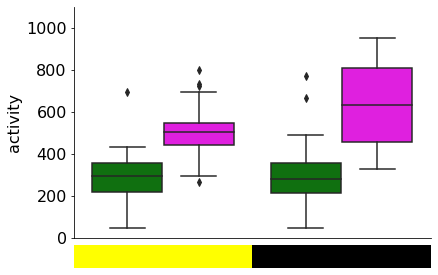

In [12]:
figA = cumulative_activity_fig(
    [ [control_zg_df],[mutant_zg_df]],
    labels=['+','fs4'],
    legend =False,
    colors=['green', 'magenta']
)
figA.axes[0].set_ylim([0, 1100])

In [13]:
cumulative_activity_df = cumulative_activity(
     [
        [control_zg_df], [mutant_zg_df]
    ],   
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$']
)
cumulative_activity_df.to_csv('220503_activity.csv')

(400.0, 1300.0)

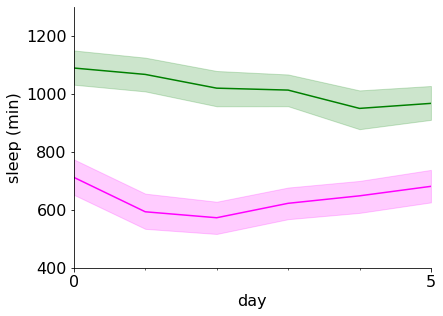

In [14]:
fig2 = per_diem_fig(
    [[mutant_zg_df], [control_zg_df]],
    labels=[r'${gba1b}^{Δ1/ΔTT}$', '+'],
    colors =['magenta', 'green'],
    legend =False,
    #fig_size=(10, 10)
    #start_time=timedelta(hours=1),
    #end_time=timedelta(hours=22),
    #start_day=0,
    #end_day=7
)
fig2.axes[0].set_ylim([400, 1300])

(0.0, 800.0)

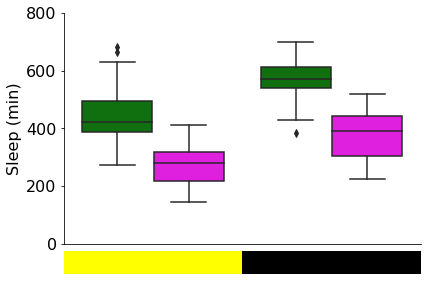

In [15]:
fig3 = cumulative_sleep_fig(
    [ [control_zg_df],[mutant_zg_df]],
    colors = ['green', 'magenta'],
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$'],
    legend =False,
)
fig3.axes[0].set_ylim([0, 800])

(0.0, 50.0)

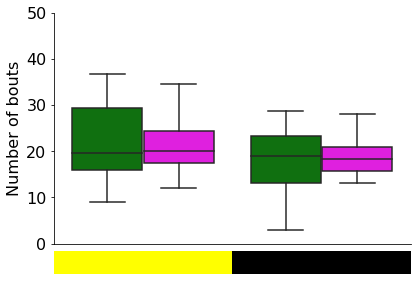

In [16]:
fig4 = cumulative_bout_number_fig(
    [ [control_zg_df],[mutant_zg_df]],
    labels=['+','fs4'],
    legend =False,
        colors=['green', 'magenta']
)
fig4.axes[0].set_ylim([0, 50])

(0.0, 80.0)

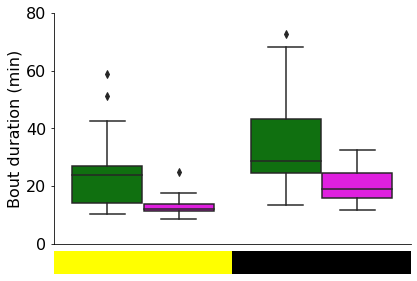

In [17]:
fig5 = cumulative_bout_duration_fig(
    [ [control_zg_df],[mutant_zg_df]],
    labels=['+','fs4'],
    legend =False,
    colors=['green', 'magenta']
)
fig5.axes[0].set_ylim([0, 80])

In [18]:
fig1.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mzt.tiff')
fig2.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mfs4-total.tiff',
            bbox_inches = 'tight')
figA.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mfs4-activity.tiff',
            bbox_inches = 'tight')
fig3.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mfs4-total-sleep.tiff',
            bbox_inches = 'tight')
fig4.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mfs4-sleepbouts.tiff',
            bbox_inches = 'tight')
fig5.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_2205/FIGS/mfs4-sleep-len.tiff',
            bbox_inches = 'tight')


#fig2.savefig('/Users/jvpro/Dropbox/2022_Cell/Neuron_MS/neuron_reviews/ADULTSLEEP_22055/FIGS/mperdiem.tiff')



In [18]:
cumulative_sleep_df = cumulative_sleep(
     [
        [control_zg_df], [mutant_zg_df]
    ],   
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$']
)
#cumulative_sleep_df.to_csv('220503_sleep.csv')
light_cumulative_sleep_df = cumulative_sleep_df[cumulative_sleep_df['light'] == 'light']
dark_cumulative_sleep_df = cumulative_sleep_df[cumulative_sleep_df['light'] == 'dark']

In [19]:
cumulative_bout_number_df = cumulative_bout_number(
     [
        [control_zg_df], [mutant_zg_df]
    ],   
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$']
)
#cumulative_bout_number_df.to_csv('220503_boutnum.csv')
light_cumulative_bout_number_df = cumulative_bout_number_df[cumulative_bout_number_df['light'] == 'light']
dark_cumulative_bout_number_df = cumulative_bout_number_df[cumulative_bout_number_df['light'] == 'dark']

In [20]:
#one fo
cumulative_activity_df = cumulative_activity(
     [
        [control_zg_df], [mutant_zg_df]
    ],   
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$']
)
light_cumulative_activity_df = cumulative_activity_df[cumulative_activity_df['light'] == 'light']
dark_cumulative_activity_df = cumulative_activity_df[cumulative_activity_df['light'] == 'dark']

In [21]:
cumulative_bout_length_df = cumulative_bout_duration(
     [
        [control_zg_df], [mutant_zg_df]
    ],   
    labels=['+', r'${gba1b}^{Δ1/ΔTT}$']
)

light_cumulative_bout_length_df = cumulative_bout_length_df[cumulative_bout_length_df['light'] == 'light']
dark_cumulative_bout_length_df = cumulative_bout_length_df[cumulative_bout_length_df['light'] == 'dark']
#cumulative_bout_length_df.to_csv('220503_boutlength.csv')

In [22]:
anova_assistant(
    [
        [control_zg_df],
        [mutant_zg_df],
    ],   
    ['+', 'fs4tt'],
    timedelta(hours=12, minutes=1),
    timedelta(hours=14)
)

Activity:

 Equal variance case:


  Anova:

  Source  ddof1  ddof2         F     p-unc       np2
0  label      1     58  3.035465  0.086764  0.049733

  Tukey post-hoc:

   A      B    mean(A)     mean(B)     diff         se         T   p-tukey    hedges
0  +  fs4tt  88.093056  114.570556 -26.4775  15.197226 -1.742259  0.086764 -0.444007
Sleep:

 Unequal variance case:


  Welch Anova:

  Source  ddof1     ddof2         F     p-unc       np2
0  label      1  47.43255  8.377224  0.005726  0.126206

  Games-Howell post-hoc:

   A      B  mean(A)    mean(B)       diff        se         T        df      pval    hedges
0  +  fs4tt   82.705  67.119306  15.585694  5.384881  2.894343  47.43255  0.005724  0.737611
Bout duration:

 Unequal variance case:


  Welch Anova:

  Source  ddof1      ddof2         F     p-unc      np2
0  label      1  30.753287  7.930055  0.008412  0.12028

  Games-Howell post-hoc:

   A      B     mean(A)    mean(B)       diff        se         T         df      pval 

In [23]:
homoscedasticity(data=light_cumulative_sleep_df, dv='sleep', group='label')


,W,pval,equal_var
levene,0.897698,0.347331,True


In [24]:
homoscedasticity(data=dark_cumulative_sleep_df, dv='sleep', group='label')

,W,pval,equal_var
levene,5.228672,0.025886,False


In [25]:
welch_anova(data=dark_cumulative_sleep_df, dv='sleep', between='label')
#welch_anova(data=light_cumulative_sleep_df, dv='total_sleep', between='label')

,Source,ddof1,ddof2,F,p-unc,np2
0,label,1,54.725106,82.707872,1.562428e-12,0.587798


In [26]:
#homoscedasticity(data=light_cumulative_bout_length_df, dv='bout_len', group='label')
homoscedasticity(data=light_cumulative_activity_df, dv='activity', group='label')
#homoscedasticity(data=dark_cumulative_activity_df, dv='activity', group='label')

,W,pval,equal_var
levene,0.05175,0.820845,True


In [27]:
#welch_anova(data=dark_cumulative_activity_df, dv='activity', between='label')
anova(data=light_cumulative_activity_df, dv='activity', between='label')

,Source,ddof1,ddof2,F,p-unc,np2
0,label,1,58,42.851874,1.688394e-08,0.424899


In [28]:
mwu(light_cumulative_bout_number_df[light_cumulative_bout_number_df['label'] == r'${gba1b}^{Δ1/ΔTT}$']['bout_num'],light_cumulative_bout_number_df[light_cumulative_bout_number_df['label'] == '+']['bout_num'])


,U-val,alternative,p-val,RBC,CLES
MWU,448.0,two-sided,0.982304,0.004444,0.497778


In [29]:
mwu(dark_cumulative_bout_number_df[dark_cumulative_bout_number_df['label'] == r'${gba1b}^{Δ1/ΔTT}$']['bout_num'],
    dark_cumulative_bout_number_df[dark_cumulative_bout_number_df['label'] == '+']['bout_num'])

,U-val,alternative,p-val,RBC,CLES
MWU,463.5,two-sided,0.847573,-0.03,0.515


In [30]:
mwu(light_cumulative_bout_length_df[light_cumulative_bout_length_df['label'] == r'${gba1b}^{Δ1/ΔTT}$']['bout_len'],
    light_cumulative_bout_length_df[light_cumulative_bout_length_df['label'] == '+']['bout_len'])

,U-val,alternative,p-val,RBC,CLES
MWU,148.0,two-sided,0.000008,0.671111,0.164444


In [31]:
mwu(dark_cumulative_bout_length_df[dark_cumulative_bout_length_df['label'] == r'${gba1b}^{Δ1/ΔTT}$']['bout_len'],
    dark_cumulative_bout_length_df[dark_cumulative_bout_length_df['label'] == '+']['bout_len'])

,U-val,alternative,p-val,RBC,CLES
MWU,133.5,two-sided,0.000003,0.703333,0.148333


In [ ]:

# mutant_zg_inc_df = make_zeitgeber_df(mutant_df, include_incomplete=True)
# control_zg_inc_df = make_zeitgeber_df(control_df, include_incomplete=True)

Due to a quirk of how incomplete days are handled under the hood, it looks like everyone's sleeping for the first 8.5 hours of this data, while in fact there is no data. 

I haven't fixed this yet because it's annoying. But let me know if this plot is going in the paper and I'll take care of it.

In [ ]:
# fig = single_trial_zeitgeber_fig(
#     [mutant_zg_inc_df, control_zg_inc_df],
#     ['fs4', '+'],
#     days=[0],
# )

It's hard to see what's going on here with the default figure size. Let's stretch things out

## Multiple trials per genotype

`zeitgeber_fig` is doing all the work under the hood, so everything we've looked at with `single_trial_zeitgeber_fig` applies to `zeitgeber_fig`. The only difference is in the form of the arguments `zg_dfs` and `days`.

Suppose we have 2 trials for genotype 1 and 1 trial for genotype 2. To express this, we use a list of lists - the list of trials for each genotype:

```
zg_dfs = [[genotype_1_trial_1_zg_df, genotype_1_trial_2_zg_df], [genotype_2_trial_1_zg_df]]
```

Easy enough. Things get a little messier for the `days` argument. In the general case, we could select a different set of days for each trial, for each genotypes. Therefore we need a list of lists of lists - the list of day indices, for each trial, for each genotype:

```
days = [[[1,2,3], [4,5]], [6]]
```

In [ ]:
# genotype_1_trial_1_zg_df = mutant_zg_df
# genotype_1_trial_2_zg_df = mutant_zg_df

# genotype_2_trial_1_zg_df = control_zg_df

In [ ]:
# fig = zeitgeber_fig(
#     [
#         [genotype_1_trial_1_zg_df, genotype_1_trial_2_zg_df],
#         [genotype_2_trial_1_zg_df]
#     ],
#     ['fs4', '+'],
#     days=
#     [
#         [
#             [1,2,3],
#             [4, 5]
#         ],
#         [
#             [6]
#         ]
        
#     ]
# )

There are two more options for `days`. You can select a single day from all trials and genotypes with an `int`:

In [ ]:
# fig = zeitgeber_fig(
#     [
#         [genotype_1_trial_1_zg_df, genotype_1_trial_2_zg_df],
#         [genotype_2_trial_1_zg_df]
#     ],
#     ['fs4', '+'],
#     days=0
# )

Or you can omit it entirely to select all days from all trials and genotypes

In [ ]:
# fig = zeitgeber_fig(
#     [
#         [genotype_1_trial_1_zg_df, genotype_1_trial_2_zg_df],
#         [genotype_2_trial_1_zg_df]
#     ],
#     ['fs4', '+']
# )

## Single trial per genotype

Same deal as `sleep_plot` here, requires a list of trials for each genotype. 

The arguments aren't as complicated, so only one interface this time, `per_diem_fig`

In [ ]:
fig = per_diem_fig(
    [[mutant_zg_df], [control_zg_df]],
    labels=['fs4', '+'] 
)

Same option for `start_time` and `end_time` as `sleep_plot`, but the day selection works a little differently. Instead of the complicated nested list situation, the same `start_day` and `end_day` are used across all trials

In [ ]:
# fig = per_diem_fig(
#     [
#         [genotype_1_trial_1_zg_df, genotype_1_trial_2_zg_df],
#         [genotype_2_trial_1_zg_df]
#     ],   
#     labels=['fs4', '+'],
#     start_time=timedelta(hours=1),
#     end_time=timedelta(hours=22),
#     start_day=1,
#     end_day=9
# )    